In [1]:
import pandas as pd
import module_import
from src.quant_analysis.module_import import ETF_0050, stock_2330
df_0050 = ETF_0050()
df_2330 = stock_2330()

[2024-08-30 10:50:59,885][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-08-30 10:51:00,219][log.log][INFO] Query execution time: 0.14178085327148438 seconds.
[2024-08-30 10:51:00,247][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='2330' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='2330' ORDER BY Date DESC LIMIT 500;

[2024-08-30 10:51:00,422][log.log][INFO] Query execution time: 0.13203215599060059 seconds.


In [3]:
df = pd.merge(df_0050,df_2330,right_index=True,left_index=True,how="inner")
df.rename(columns={"Close_x": "0050", "Close_y": "2330"}, inplace=True)
df

,0050,2330
Date,,
2022-08-11,112.505,514.0
2022-08-12,113.208,517.0
2022-08-15,114.239,523.0
2022-08-16,114.426,525.0
2022-08-17,114.473,527.0
...,...,...
2024-08-23,180.950,949.0
2024-08-26,181.250,950.0
2024-08-27,180.450,942.0


# 夏普比率 (Sharpe Ratio )
## 衡量承擔相同風險下所獲得的報酬
## $$Sharpe \ \ ratio= \frac{r_i-r_f}{\sigma}$$

In [4]:
r= df.pct_change(1)
r

,0050,2330
Date,,
2022-08-11,NaN,NaN
2022-08-12,0.006249,0.005837
2022-08-15,0.009107,0.011605
2022-08-16,0.001637,0.003824
2022-08-17,0.000411,0.003810
...,...,...
2024-08-23,0.000553,-0.002103
2024-08-26,0.001658,0.001054
2024-08-27,-0.004414,-0.008421


In [5]:
import numpy as np
ar = r.mean()*252
std = r.std()*np.sqrt(252)
sp = ar / std
sp

0050    1.235378
2330    1.146461
dtype: float64

### Rolling Sharp Ratio

In [9]:
ar = r.rolling(252).mean()*252
ar.dropna(inplace=True)
std = r.rolling(252).std()*252**0.5
std.dropna(inplace=True)
sp = ar/std
sp

,0050,2330
Date,,
2023-08-28,0.513680,0.367824
2023-08-29,0.510229,0.366594
2023-08-30,0.485794,0.346270
2023-08-31,0.439615,0.297395
2023-09-01,0.445813,0.278685
...,...,...
2024-08-23,1.862730,1.936615
2024-08-26,1.893554,1.939998
2024-08-27,1.854418,1.900454


<Axes: xlabel='Date'>

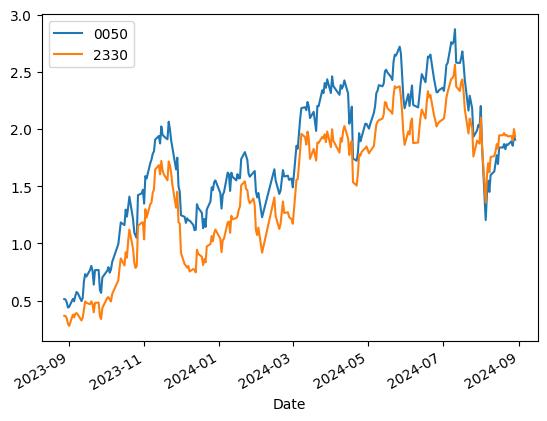

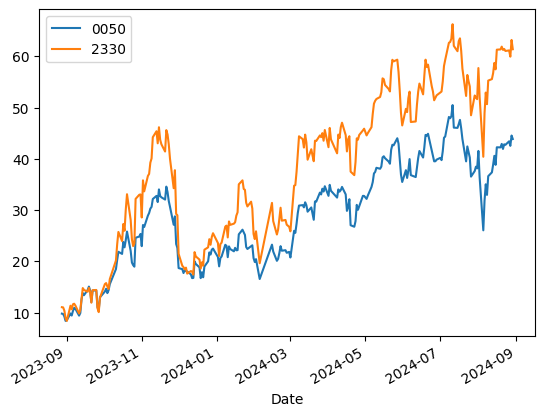

In [14]:
sp.plot()
(ar * 100).plot()

# 索提諾比率 (Sortino Ratio)
## 衡量相同下行風險下所獲得的報酬
## $$Sortino \ \ ratio=\frac{R-T}{\sigma_D}$$

In [15]:
std = r.std() * np.sqrt(252)
std

0050    0.211473
2330    0.308874
dtype: float64

In [16]:
std_D = r[r<0].std()*np.sqrt(252)
std_D

0050    0.161522
2330    0.208203
dtype: float64

In [17]:
ar = r.mean()*252
st = ar/std_D*100
st

0050    161.741445
2330    170.080201
dtype: float64